In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt


## fucntions:

In [9]:
import seaborn as sns

def basecall_quality_histogram(
    df: pd.DataFrame,
    mean_qscore_col: str,
    mapq_query: str,
) -> None:
    # TODO: maybe add a 3rd that is based on the length of the template?
    _, axes = plt.subplots(1, 2, figsize=(11, 3), sharey=True)

    sns.histplot(df, x=mean_qscore_col, ax=axes[0])
    axes[0].set_title("all reads")

    sns.histplot(df.query(mapq_query), x=mean_qscore_col, ax=axes[1])
    axes[1].set_title(mapq_query)

    plt.suptitle(f"mean basecall quality histogram")


In [11]:
sum_basecall_post_run_path = "/home/michalula/data/cas9_nanopore/data/20241127_Cas9_K562unedited_day2_R9_minion/post_seq_basecall/5mCG/to_t2t_v1_1/summary_sort_align_t2t_v1_1_trim_20241127_MR_Cas9_K562unedited_day2_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.tsv"
# "/home/michalula/data/cas9_nanopore/data/2024927_Cas9_R9_promethion_K562/post_seq_basecall_align/summary_aligned_t2t_v1_1_trimmed_postrun_basecall_sup_20240927_cas9_R9_promethion.tsv"

# Load the uploaded Dorado summary TSV file
file_path = sum_basecall_post_run_path #  '/mnt/data/summary_aligned_dorado_k16_t2t_v1_1_trim_bam_pass_merged.tsv'
dorado_summary = pd.read_csv(file_path, sep='\t')

# Display the first few rows to understand the structure of the data
dorado_summary.head()


,filename,read_id,run_id,channel,mux,start_time,duration,template_start,template_duration,sequence_length_template,...,alignment_num_aligned,alignment_num_correct,alignment_num_insertions,alignment_num_deletions,alignment_num_substitutions,alignment_mapq,alignment_strand_coverage,alignment_identity,alignment_accuracy,alignment_bed_hits
0,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,ec91888f-915d-429f-af52-4338364ab37f,dd06a2541b33525b9561396d8ed12470f907c167,213,3,3416.14,58.8675,3475.01,0.0,24677,...,24341,23729,334,772,612,38,0.999919,0.974857,0.932487,0
1,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,d495a50d-f87c-4a74-8006-4d9503fa48d3,dd06a2541b33525b9561396d8ed12470f907c167,268,1,7558.63,62.1725,7620.81,0.0,24047,...,23802,23442,212,440,360,60,0.998628,0.984875,0.958616,0
2,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,568247f9-ee63-48df-8a4e-254a402397eb,dd06a2541b33525b9561396d8ed12470f907c167,274,3,78517.40,106.8270,78624.20,0.0,38487,...,37926,37366,537,858,560,60,0.999376,0.985234,0.950281,0
3,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,15afa8c2-7094-4fcf-9c05-41d29181fdb2,dd06a2541b33525b9561396d8ed12470f907c167,103,4,9534.57,90.5537,9625.12,0.0,31662,...,28853,28512,878,428,341,60,0.939012,0.988181,0.945389,0
4,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,18c93d52-568f-42a5-9dfe-a2ceb2058b2e,dd06a2541b33525b9561396d8ed12470f907c167,477,3,10567.10,35.8187,10603.00,0.0,8303,...,8262,8232,41,73,30,60,1.000000,0.996369,0.982808,0


In [12]:
pd.DataFrame([dorado_summary.columns]).T

,0
0,filename
1,read_id
2,run_id
3,channel
4,mux
5,start_time
6,duration
7,template_start
8,template_duration
9,sequence_length_template


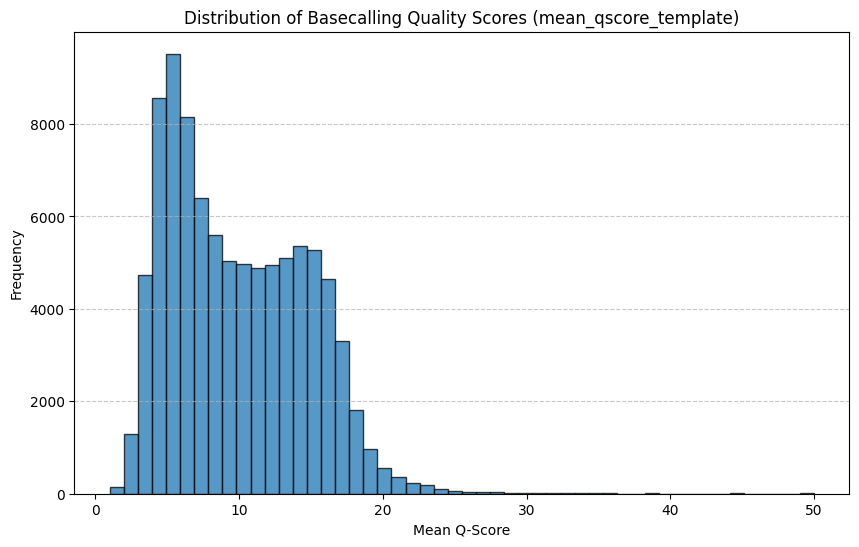

In [13]:
import matplotlib.pyplot as plt

# Plot the distribution of mean_qscore_template
if 'mean_qscore_template' in dorado_summary.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dorado_summary['mean_qscore_template'], bins=50, alpha=0.75, edgecolor='black')
    plt.title('Distribution of Basecalling Quality Scores (mean_qscore_template)')
    plt.xlabel('Mean Q-Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The column 'mean_qscore_template' is not present in the dataset.")


In [14]:
dorado_summary.shape

(92501, 29)

In [15]:
dorado_summary['alignment_genome'] != "*"

0         True
1         True
2         True
3         True
4         True
         ...  
92496    False
92497    False
92498    False
92499    False
92500    False
Name: alignment_genome, Length: 92501, dtype: bool

In [16]:
# Filter rows where 'alignment_genome' is not null or empty (indicating alignment to a chromosome)
aligned_reads = dorado_summary[dorado_summary['alignment_genome'].str.strip() != "*"]

# # Display the filtered DataFrame to the user
# import ace_tools as tools; 
# tools.display_dataframe_to_user(name="Aligned Reads Data", dataframe=aligned_reads)


In [17]:
aligned_reads.shape

(55376, 29)

In [18]:
aligned_reads

,filename,read_id,run_id,channel,mux,start_time,duration,template_start,template_duration,sequence_length_template,...,alignment_num_aligned,alignment_num_correct,alignment_num_insertions,alignment_num_deletions,alignment_num_substitutions,alignment_mapq,alignment_strand_coverage,alignment_identity,alignment_accuracy,alignment_bed_hits
0,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,ec91888f-915d-429f-af52-4338364ab37f,dd06a2541b33525b9561396d8ed12470f907c167,213,3,3416.14,58.86750,3475.01,0.0,24677,...,24341,23729,334,772,612,38,0.999919,0.974857,0.932487,0
1,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,d495a50d-f87c-4a74-8006-4d9503fa48d3,dd06a2541b33525b9561396d8ed12470f907c167,268,1,7558.63,62.17250,7620.81,0.0,24047,...,23802,23442,212,440,360,60,0.998628,0.984875,0.958616,0
2,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,568247f9-ee63-48df-8a4e-254a402397eb,dd06a2541b33525b9561396d8ed12470f907c167,274,3,78517.40,106.82700,78624.20,0.0,38487,...,37926,37366,537,858,560,60,0.999376,0.985234,0.950281,0
3,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,15afa8c2-7094-4fcf-9c05-41d29181fdb2,dd06a2541b33525b9561396d8ed12470f907c167,103,4,9534.57,90.55370,9625.12,0.0,31662,...,28853,28512,878,428,341,60,0.939012,0.988181,0.945389,0
4,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,18c93d52-568f-42a5-9dfe-a2ceb2058b2e,dd06a2541b33525b9561396d8ed12470f907c167,477,3,10567.10,35.81870,10603.00,0.0,8303,...,8262,8232,41,73,30,60,1.000000,0.996369,0.982808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55371,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,7272a48a-8f28-452d-b2a2-22036de60d63,dd06a2541b33525b9561396d8ed12470f907c167,372,2,22244.00,0.64375,22244.60,0.0,211,...,191,189,0,5,2,60,0.905213,0.989529,0.964286,0
55372,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,ff68eb69-b51b-419c-9b63-dc76e404dcfa,dd06a2541b33525b9561396d8ed12470f907c167,494,3,13798.70,1.72375,13800.50,0.0,498,...,475,469,2,5,6,60,0.957831,0.987368,0.973029,0
55373,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,a62ac698-058d-4f8f-9274-e058896008d3,dd06a2541b33525b9561396d8ed12470f907c167,393,4,4538.35,0.43375,4538.79,0.0,126,...,121,117,0,2,4,26,0.960317,0.966942,0.951219,0
55374,20241127_MR_Cas9_K562unedited_day2_R9min_conve...,6ed1a995-7608-4533-acf0-f810bbc3694e,dd06a2541b33525b9561396d8ed12470f907c167,473,3,29310.50,0.61250,29311.10,0.0,244,...,223,220,7,4,3,60,0.942623,0.986547,0.940171,0


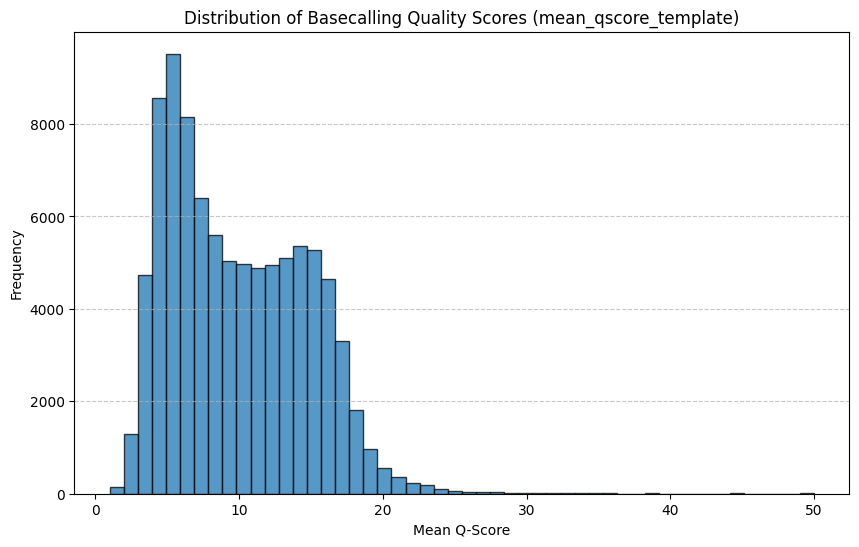

In [19]:
import matplotlib.pyplot as plt

# Plot the distribution of mean_qscore_template
if 'mean_qscore_template' in aligned_reads.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dorado_summary['mean_qscore_template'], bins=50, alpha=0.75, edgecolor='black')
    plt.title('Distribution of Basecalling Quality Scores (mean_qscore_template)')
    plt.xlabel('Mean Q-Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The column 'mean_qscore_template' is not present in the dataset.")


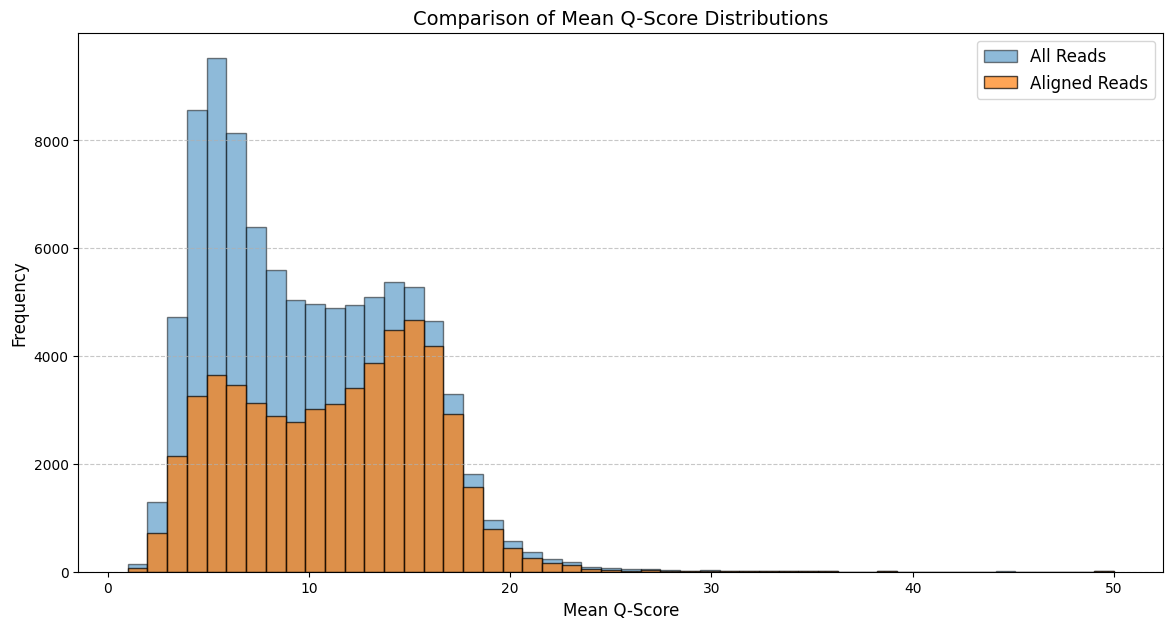

In [20]:
# Plot histograms of 'mean_qscore_template' for both aligned reads and the full dataset
plt.figure(figsize=(14, 7))

# Histogram for the full dataset
plt.hist(dorado_summary['mean_qscore_template'], bins=50, alpha=0.5, label='All Reads', edgecolor='black')

# Histogram for aligned reads
plt.hist(aligned_reads['mean_qscore_template'], bins=50, alpha=0.7, label='Aligned Reads', edgecolor='black')

# Add titles and labels
plt.title('Comparison of Mean Q-Score Distributions', fontsize=14)
plt.xlabel('Mean Q-Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

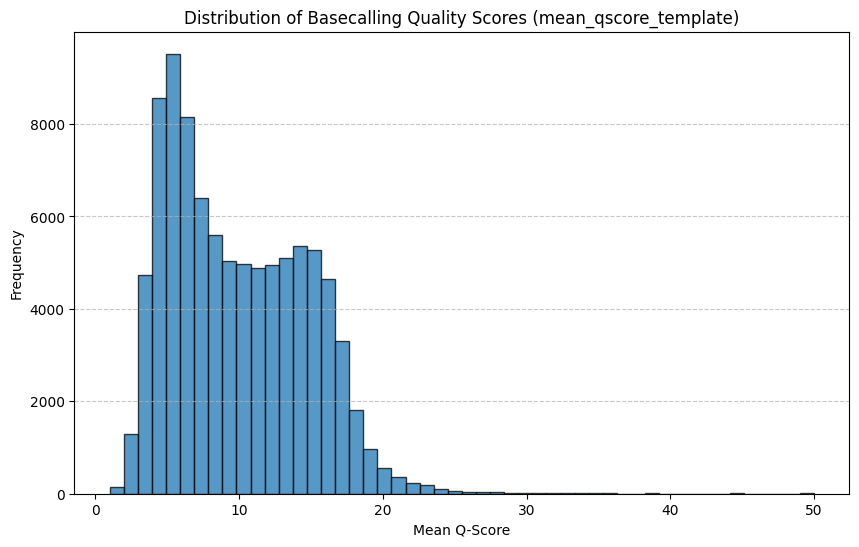

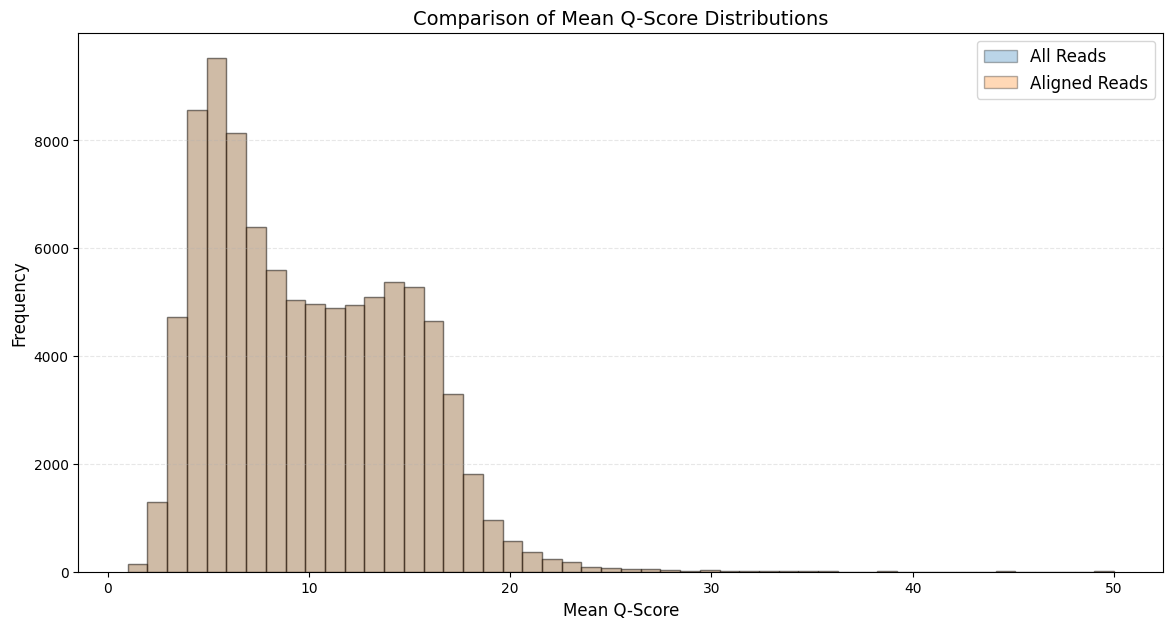

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded Dorado summary TSV file
file_path =sum_basecall_post_run_path
# "/home/michalula/data/cas9_nanopore/data/20221114_cas9_T_primes/summary_t2tv10_20221114_cas9_T_primes.exp3_mod_mappings.20221114_0044_MN36507_FAS72302_148f7cf6.sorted.tsv"
# '/mnt/data/summary_aligned_dorado_k16_t2t_v1_1_trim_bam_pass_merged.tsv'
dorado_summary = pd.read_csv(file_path, sep='\t')

# Display the first few rows to understand the structure of the data
dorado_summary.head()

# Plot the distribution of mean_qscore_template
if 'mean_qscore_template' in dorado_summary.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dorado_summary['mean_qscore_template'], bins=50, alpha=0.75, edgecolor='black')
    plt.title('Distribution of Basecalling Quality Scores (mean_qscore_template)')
    plt.xlabel('Mean Q-Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The column 'mean_qscore_template' is not present in the dataset.")

# Filter rows where 'alignment_genome' is not null or empty (indicating alignment to a chromosome)
aligned_reads = dorado_summary[dorado_summary['alignment_genome'].notnull() & dorado_summary['alignment_genome'].str.strip() != ""]

# Display the filtered DataFrame to the user
# import ace_tools as tools; tools.display_dataframe_to_user(name="Aligned Reads Data", dataframe=aligned_reads)

# Plot histograms of 'mean_qscore_template' for both aligned reads and the full dataset
plt.figure(figsize=(14, 7))

# Histogram for the full dataset
plt.hist(dorado_summary['mean_qscore_template'], bins=50, alpha=0.3, label='All Reads', edgecolor='black')

# Histogram for aligned reads
plt.hist(aligned_reads['mean_qscore_template'], bins=50, alpha=0.3, label='Aligned Reads', edgecolor='black')

# Add titles and labels
plt.title('Comparison of Mean Q-Score Distributions', fontsize=14)
plt.xlabel('Mean Q-Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


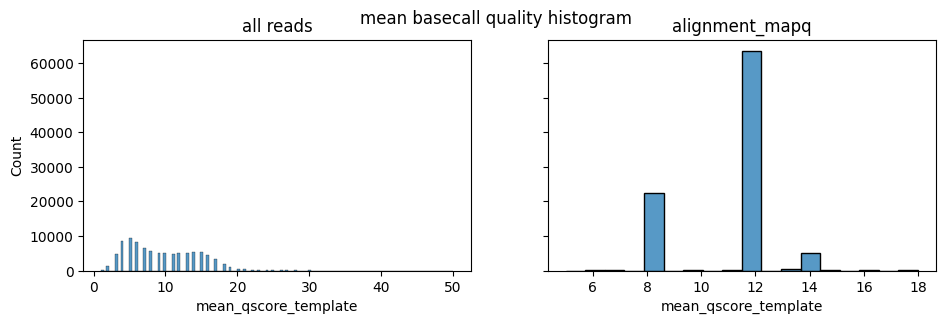

In [22]:

basecall_quality_histogram(dorado_summary, 'mean_qscore_template', 'alignment_mapq')

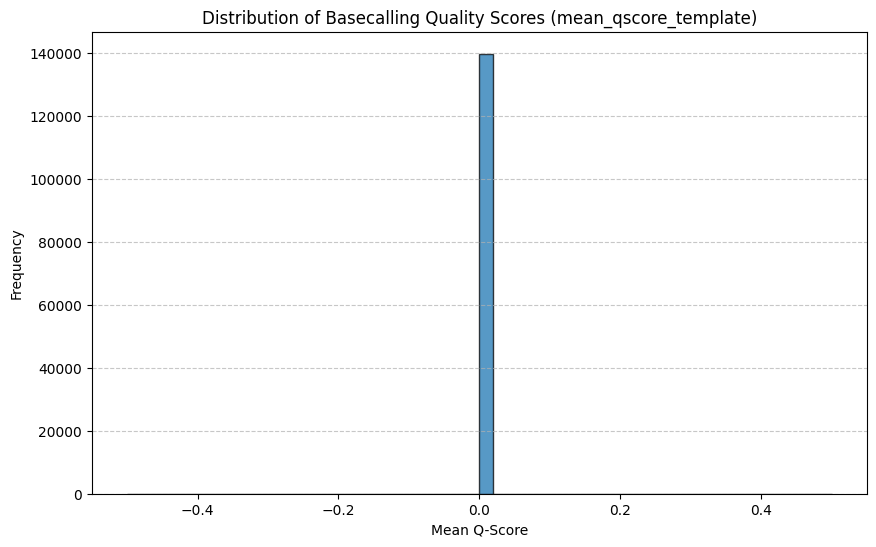

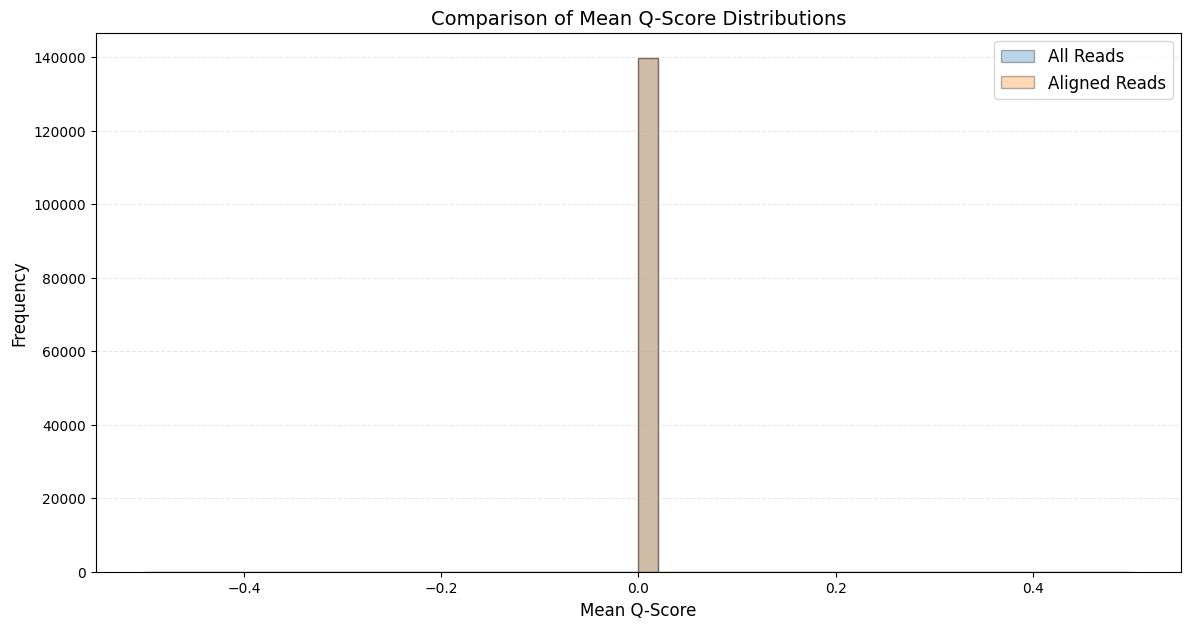

In [23]:

# Load the uploaded Dorado summary TSV file
file_path = "/home/michalula/data/cas9_nanopore/data/20221114_cas9_T_primes/summary_t2tv10_20221114_cas9_T_primes.exp3_mod_mappings.20221114_0044_MN36507_FAS72302_148f7cf6.sorted.tsv"

# "/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/sum_cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.tsv"
# file_path ="/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/sum_cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.tsv"
# "/home/michalula/data/cas9_nanopore/data/20221114_cas9_T_primes/summary_t2tv10_20221114_cas9_T_primes.exp3_mod_mappings.20221114_0044_MN36507_FAS72302_148f7cf6.sorted.tsv"
# '/mnt/data/summary_aligned_dorado_k16_t2t_v1_1_trim_bam_pass_merged.tsv'
dorado_summary = pd.read_csv(file_path, sep='\t')

# Display the first few rows to understand the structure of the data
dorado_summary.head()

# Plot the distribution of mean_qscore_template
if 'mean_qscore_template' in dorado_summary.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dorado_summary['mean_qscore_template'], bins=50, alpha=0.75, edgecolor='black')
    plt.title('Distribution of Basecalling Quality Scores (mean_qscore_template)')
    plt.xlabel('Mean Q-Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The column 'mean_qscore_template' is not present in the dataset.")

# Filter rows where 'alignment_genome' is not null or empty (indicating alignment to a chromosome)
aligned_reads = dorado_summary[dorado_summary['alignment_genome'].notnull() & dorado_summary['alignment_genome'].str.strip() != ""]

# Display the filtered DataFrame to the user
# import ace_tools as tools; tools.display_dataframe_to_user(name="Aligned Reads Data", dataframe=aligned_reads)

# Plot histograms of 'mean_qscore_template' for both aligned reads and the full dataset
plt.figure(figsize=(14, 7))

# Histogram for the full dataset
plt.hist(dorado_summary['mean_qscore_template'], bins=50, alpha=0.3, label='All Reads', edgecolor='black')

# Histogram for aligned reads
plt.hist(aligned_reads['mean_qscore_template'], bins=50, alpha=0.3, label='Aligned Reads', edgecolor='black')

# Add titles and labels
plt.title('Comparison of Mean Q-Score Distributions', fontsize=14)
plt.xlabel('Mean Q-Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


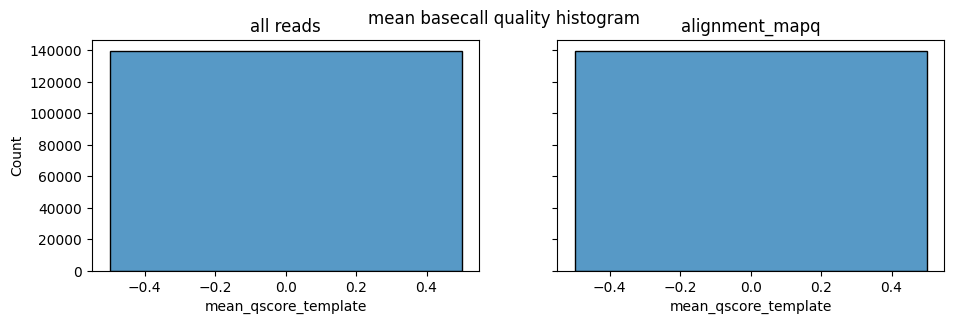

In [24]:
basecall_quality_histogram(dorado_summary, 'mean_qscore_template', 'alignment_mapq')

In [25]:
dorado_summary['mean_qscore_template']

0         0
1         0
2         0
3         0
4         0
         ..
139698    0
139699    0
139700    0
139701    0
139702    0
Name: mean_qscore_template, Length: 139703, dtype: int64

In [26]:
dorado_summary['alignment_mapq']

0         40
1         40
2         40
3         40
4         40
          ..
139698    40
139699    40
139700    40
139701    40
139702    40
Name: alignment_mapq, Length: 139703, dtype: int64

# Jurkat dorado basecall R9

In [30]:
sum_basecall_post_run_path = "/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/to_t2t_v1_1_dorado_R9/summary_sort_aligned_t2t_v1_1_trim_20231019_cas9_12ef_Jurkat_R9_converted_fast5_called.dna_r9.4.1_e8_sup@v3.3.5mC.tsv"
# "/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/to_t2t_v1_1/summary_aligned_trim_20240927_cas9_R9_promethion_converted_fast5_called.dna_r9.4.1_e8_sup@v3.6.bam.tsv"
# "/home/michalula/data/cas9_nanopore/data/2024927_Cas9_R9_promethion_K562/post_seq_basecall_align/summary_aligned_t2t_v1_1_trimmed_postrun_basecall_sup_20240927_cas9_R9_promethion.tsv"

# Load the uploaded Dorado summary TSV file
file_path = sum_basecall_post_run_path #  '/mnt/data/summary_aligned_dorado_k16_t2t_v1_1_trim_bam_pass_merged.tsv'
dorado_summary = pd.read_csv(file_path, sep='\t')

# Display the first few rows to understand the structure of the data
dorado_summary.head()


,filename,read_id,run_id,channel,mux,start_time,duration,template_start,template_duration,sequence_length_template,...,alignment_num_aligned,alignment_num_correct,alignment_num_insertions,alignment_num_deletions,alignment_num_substitutions,alignment_mapq,alignment_strand_coverage,alignment_identity,alignment_accuracy,alignment_bed_hits
0,20231019_cas9_12ef_Jurkat_R9_converted_fast5.pod5,5e2d7ccb-0741-4482-a777-281ac2f2fbae,8ae2b0877f41c700d7cac84a148d7f6acd5665e5,492,3,59828.8,62.4245,59891.2,0.0,22216,...,19364,19186,151,252,178,35,0.878421,0.990808,0.970608,0
1,20231019_cas9_12ef_Jurkat_R9_converted_fast5.pod5,f0c8711a-eedd-46f4-984a-55d26f36224c,8ae2b0877f41c700d7cac84a148d7f6acd5665e5,61,4,207198.0,61.2255,207260.0,0.0,15633,...,8528,8386,121,480,142,1,0.553253,0.983349,0.918611,0
2,20231019_cas9_12ef_Jurkat_R9_converted_fast5.pod5,c99b801f-9ef0-4f95-aa21-d101f2615273,8ae2b0877f41c700d7cac84a148d7f6acd5665e5,40,4,197299.0,2.6750,197302.0,0.0,944,...,925,922,9,8,3,60,0.989407,0.996757,0.978769,0
3,20231019_cas9_12ef_Jurkat_R9_converted_fast5.pod5,f373a2cf-c456-4925-b1e0-4bd6e66dd19f,8ae2b0877f41c700d7cac84a148d7f6acd5665e5,231,4,60302.1,57.5037,60359.6,0.0,25975,...,22762,22033,3205,677,729,1,0.999692,0.967973,0.826940,0
4,20231019_cas9_12ef_Jurkat_R9_converted_fast5.pod5,62dc248f-0549-4461-824f-76e5c09cbb87,8ae2b0877f41c700d7cac84a148d7f6acd5665e5,478,1,17939.5,2.8300,17942.3,0.0,619,...,614,603,5,13,11,7,1.000000,0.982085,0.954114,0


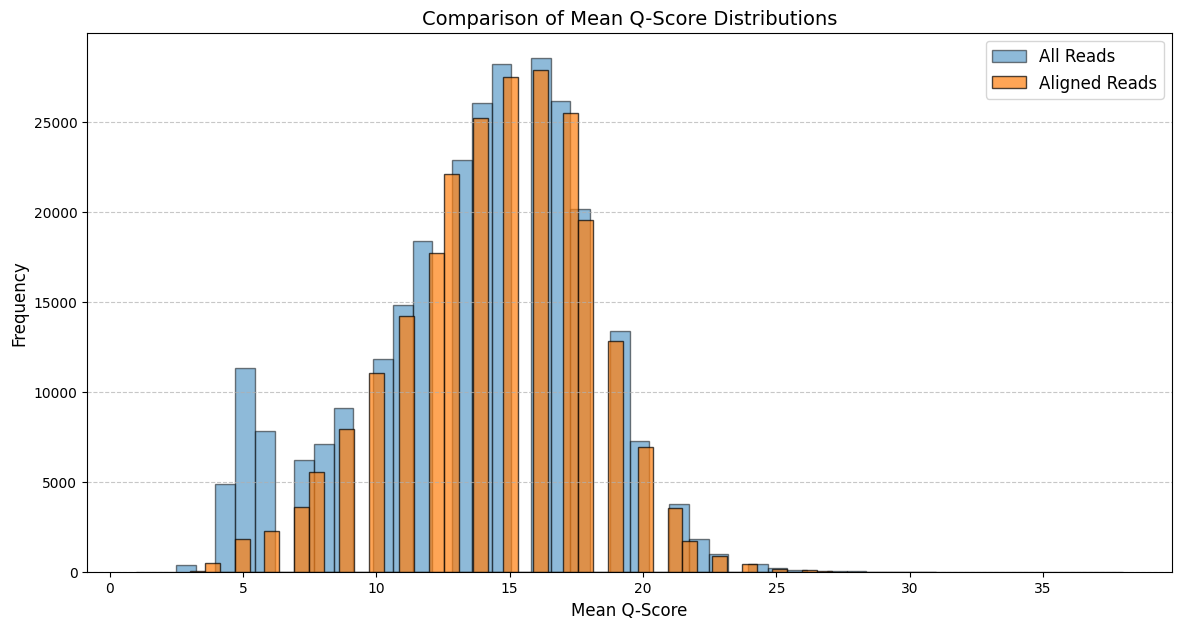

In [31]:
# Filter rows where 'alignment_genome' is not null or empty (indicating alignment to a chromosome)
aligned_reads = dorado_summary[dorado_summary['alignment_genome'].str.strip() != "*"]

# Plot histograms of 'mean_qscore_template' for both aligned reads and the full dataset
plt.figure(figsize=(14, 7))

# Histogram for the full dataset
plt.hist(dorado_summary['mean_qscore_template'], bins=50, alpha=0.5, label='All Reads', edgecolor='black')

# Histogram for aligned reads
plt.hist(aligned_reads['mean_qscore_template'], bins=50, alpha=0.7, label='Aligned Reads', edgecolor='black')

# Add titles and labels
plt.title('Comparison of Mean Q-Score Distributions', fontsize=14)
plt.xlabel('Mean Q-Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

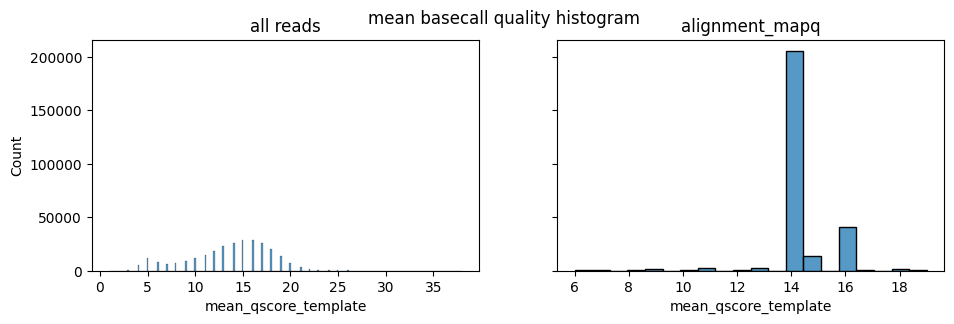

In [32]:
basecall_quality_histogram(dorado_summary, 'mean_qscore_template', 'alignment_mapq')